![Data-Preparation.jpg](https://images.xenonstack.com/blog/Data-Preparation.jpg " This is data prepration Step")

# Titanic Exploratory Data Analysis

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [DataSet Loading and Brif Description](#section2)<br>
    - 2.1 [Variable Notes](#section21)<br>
3. [Examining Data Available From An Existing Information Source-Data profiling](#section3)<br>
    - 3.1 [Basic DataSet Understanding](#section31)<br>
    - 3.2 [Pre-Profile](#section32)<br>
    - 3.3 [Data Preprocessing](#section33)<br>
    - 3.4 [Post  Profiling](#section34)<br>
4. [Observation & Questions](#section4)<br>
    - 4.1 [How many People Survival](#section41)<br>
	- 4.2 [Pclass to Survival Rate](#section42)<br>
	- 4.3 [Sex to Survival Rate](#section43)<br>
	- 4.3 [Age to Survival Rate](#section43)<br>
	- 4.4 [SibSp to Survival Rate](#section44)<br>
	- 4.5 [Parch to Survival Rate](#section45)<br>

<a id = section1> </a>

### 1. Problem Statement


__What sorts of people were likely to survive.__

We will be doing and exploring with help of basic uses of __numpy__ and __pandas__ and will cover basic syntex/command of __Exploratory Data Analysis(EDA)__  which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

- Defining the problem statement (Intrduction)
- Collecting the data (Source)
- Preprocessing the data (Data wrangling)
- Exploratory data analysis (EDA)<br>
    Understand the data by EDA and EDA is a critical and first step in analyzing the data.
    - Finding patterns in Data ( Classification, Clustering, Correlation, Regression .. )
    - Checking of assumptions
    - Determining relationships in Data
    - Preliminary selection of appropriate technology  ( use of techniques of system analysis/operations research in the selection of the optimal - or most appropriate)
    - Detection of mistakes


<a id = section2> </a>

### 2. DataSet Loading and Brif Description

| Column Name   | Description                                               |
| ------------- |-------------                                              | 
| PassengerId   | Passenger Identity                                        | 
| Cabin         | Cabin number                                              |
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| Pclass        | Class of ticket  (1 = first; 2 = second; 3 = third)       | 
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Embarked      | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|
| Survived      | Whether passenger survived or not Survival (0 = no; 1 = yes)| 

<a id=section201></a>

### 2.1 Variable Notes
__pclass:__<br> A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

__age:__ <br> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp:__ The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

__parch:__ The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
# Importing packges

import numpy as np              # milti-dimensional array and matrices
import pandas as pd             # manipulation and analysis
import pandas_profiling 
import matplotlib.pyplot as plt # umerical mathematics extension NumPy ( Ploting libarary)
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics


'''
%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of 
plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that
produced it.
'''

%matplotlib inline

In [3]:
# we can see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing data Set Desktop/TanujGit/ExploratoryDataAnalysis-EDA/DataSet

TitanicData = pd.read_csv("C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet/Titanic_DataSet.csv")
TitanicData.head()
TitanicData.tail()

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived
886,887,NaN,"Montvila, Rev. Juozas",male,27.0,2,0,0,211536,13.00,S,0
887,888,B42,"Graham, Miss. Margaret Edith",female,19.0,1,0,0,112053,30.00,S,1
888,889,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,1,2,W./C. 6607,23.45,S,0
889,890,C148,"Behr, Mr. Karl Howell",male,26.0,1,0,0,111369,30.00,C,1
890,891,NaN,"Dooley, Mr. Patrick",male,32.0,3,0,0,370376,7.75,Q,0


<a id = section3> </a>

### 3.Examining Data Available From An Existing Information Source-Data profiling

<a id=section31> </a>

### 3.1 Basic DataSet Understanding

In [3]:
TitanicData.shape

(891, 12)

In [4]:
TitanicData.columns

Index(['PassengerId', 'Cabin', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Cabin          204 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Observation:


- Total row __891__ and columns are __12__
- PassengerId, Name, Sex, Pclass, sibsp, Parch, Ticket, Fare and Survived, which has all 891 has __NOT Null__ values.
- Cabin  __78%__ Null values
- Age __20% Null__ Values
- Embarked   __~0.03%__ Null Values ( only 2 records has null values)


In [6]:
#lets see if there are any more columns with missing values 
null_columns=TitanicData.columns[TitanicData.isnull().any()]
TitanicData.isnull().sum()

PassengerId      0
Cabin          687
Name             0
Sex              0
Age            177
Pclass           0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [8]:
null_columns # Age, Fare and cabin has missing values. we will see how to fill missing values next.

Index(['Cabin', 'Age', 'Embarked'], dtype='object')

In [7]:
TitanicData.describe()
# include='all' gives the summary statistics of all the columns.

,PassengerId,Age,Pclass,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,2.308642,0.523008,0.381594,32.204208,0.383838
std,257.353842,14.526497,0.836071,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,28.000000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,38.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,80.000000,3.000000,8.000000,6.000000,512.329200,1.000000


#### Observation :
- The mean, min and max are self-explanatory.
- std is the standard deviation, which shows how data is dispersed.
- The larger Variance /Standard Deviation in Dataset more dispersed in dataset. You can see STD value is 49.693429 for FARE. And min is zero and max value 512.32920.
- Function gives the __mean, std and IQR(Interquartile range)__ values. It excludes character column and calculate summary statistics only for numeric columns
- Min “__Fare__“ is zero. There might be politics, coupon , staff, pilot seat. There could be any reason whose fare is ZERO.
- For __Pclass__, mean (2.308642) is lower than the median (3.0000)(50%). This shows that the classes of the passenger was skewed more towards 3rd class, as most people were on the 3rd class.
- For Fare, mean (32.204208) is higher than the median (14.454200). This shows that the fares were skewed more towards lower fares, as most people were on the 3rd class
- For __SibSp__, the mean is (0.523008) is higher than the median(0.0000). The skew is to the left as many passengers were travelling without a spouse or sibling.
- For __Survived__, mean (0.383838) is higher than the median (0.0000). This is because many passengers died, thus skew was to the left.


<a id = section32> </a>

### Pre-Profile

In [ ]:
profile = pandas_profiling.ProfileReport(TitanicData)
profile.to_file(outputfile="titanic_before_preprocessing.html")

<a id = section33> </a>

### Data Preprocesing
- Very very basic Dealing with missing values
        -We can replace missing values of Age with median values.
        -Replacing 0 values of fare with median values.
        -Cabin Has too many values , we can drop column.

In [122]:
Median_Age = TitanicData.Age.median()
TitanicData.Age.fillna(Median_Age, inplace = True)

In [123]:
TitanicData.drop('Cabin', axis = 1,inplace = True)

In [125]:
TitanicData.columns.values

array(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'], dtype=object)

In [126]:
TitanicData['Fare']=TitanicData['Fare'].replace(0,TitanicData['Fare'].median())

In [127]:
TitanicData['FamilySize'] = TitanicData['SibSp'] + TitanicData['Parch']+1

In [132]:
TitanicData['GenderClass'] = TitanicData.apply(lambda x: 'Child' if x['Age'] < 15 else x['Sex'],axis=1)

In [128]:
TitanicData.columns.values

array(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'FamilySize'],
      dtype=object)

<a id = section302> </a>

In [134]:
TitanicData[TitanicData.Age<15].head(2)

,PassengerId,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived,FamilySize,GenderClass
7,8,"Palsson, Master. Gosta Leonard",male,2.0,3,3,1,349909,21.0750,S,0,5,Child
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,2,1,0,237736,30.0708,C,1,2,Child


<a id = section34></a>

## 3.4 Post  Profiling


In [166]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(TitanicData)
profile.to_file(outputfile="titanic_after_postprocessing.html")

<a id = section4></a>

## 4. Observation & Questionse


<a id = section41></a>

### 4.1 How many People Survival

Text(0.5,1,'Plot for survived Count.')

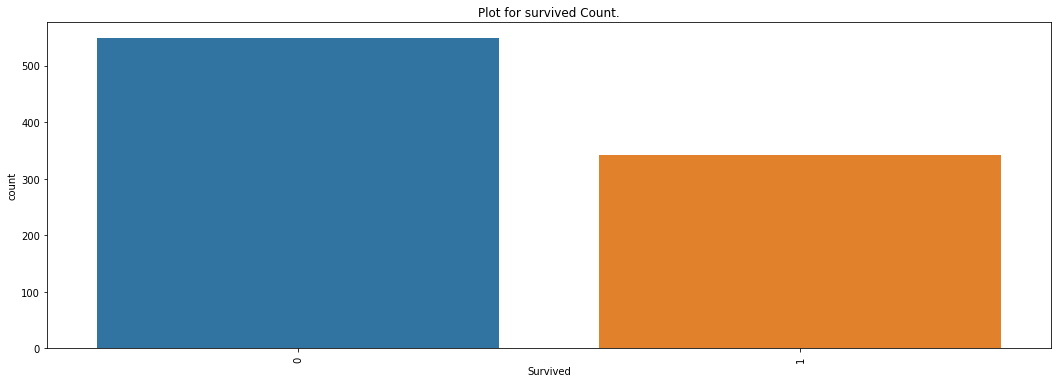

In [10]:
# TitanicData.groupby(['Survived']).count()['PassengerId'].plot.bar()
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure
TitanicData.Survived.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency
sns.countplot(x='Survived', data=TitanicData).set_title('Plot for survived Count.')

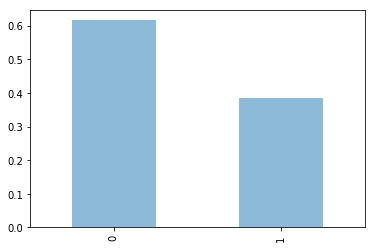

In [11]:
TitanicData.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

__Observastion :__ More people died than survived

    We can obviously see that approximate of 350 people survived and 550 people died, we can use normalization technique inorder to view concreate percentages.
    From here we can see 40% people survived and 60% of people died.

Since we have all age of the passengers, we can see the relationship between age and survival rate. Here as we gonna plot two different attributes scatter plot will do

<a id = section42></a>

#### 4.2 Pclass to Survival Rate

Text(0.5,1,'Plot for Class Count.')

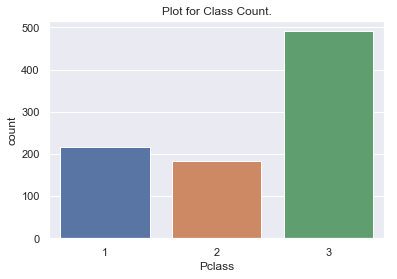

In [13]:
# counts for a single categorical variable
sns.set(style="darkgrid")
sns.countplot(x='Pclass', data=TitanicData).set_title('Plot for Class Count.')
# TitanicData.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

__Observation :__ 55% of people are from 3rd class and 25% and 20% from the rest.

There are actually 2 plots that are pretty cool to use if we wanna find correlation between two different features. one is scatter plot which we seen above and another one is KDE (Kernal Desnsity estimation). Let's correlate passenger class with passengers age.

Text(0.5,1,'Age wrt Pclass')

'From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious. '

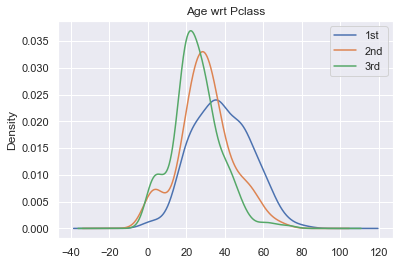

In [17]:
for x in [1,2,3]:    ## for 3 classes
    TitanicData.Age[TitanicData.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious.

<a id = section43></a>

#### 4.3 Sex to Survival Rate

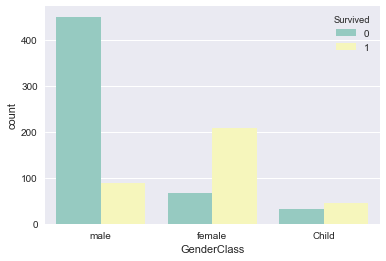

In [148]:
# TitanicData.groupby(['GenderClass','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
sns.countplot(x="GenderClass", hue='Survived', data=TitanicData, palette="Set3")

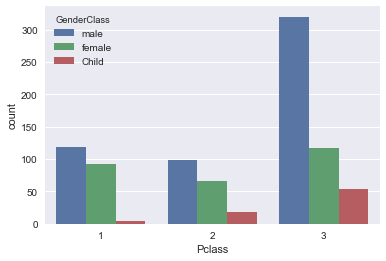

In [138]:
# Count of  two categorical variables
# TitanicData.groupby(['Pclass','GenderClass'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
sns.countplot(x="Pclass", hue="GenderClass", data=TitanicData)

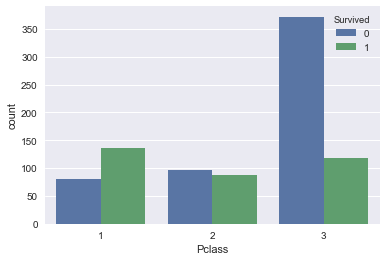

In [145]:
## TitanicData.groupby(['Pclass','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
sns.countplot(x="Pclass", hue="Survived", data=TitanicData)

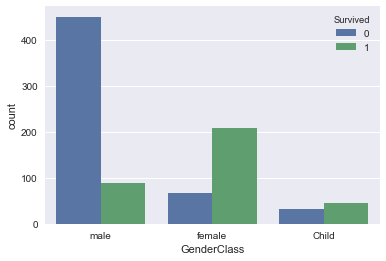

In [150]:
# TitanicData.groupby(['GenderClass','Survived'])['PassengerId'].size().unstack().plot(kind='bar')
sns.countplot(x="GenderClass", hue="Survived", data=TitanicData)

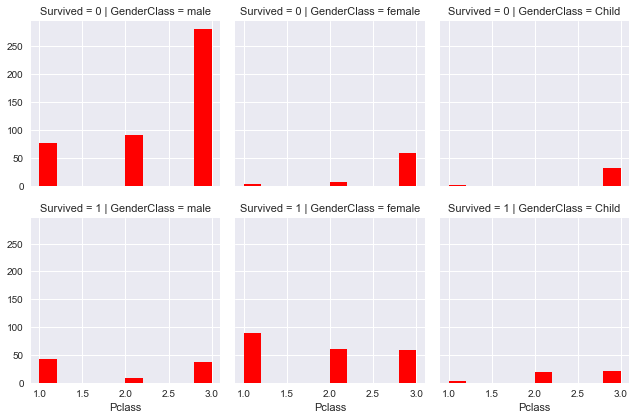

In [157]:
g =sns.FacetGrid(TitanicData, col="GenderClass",  row="Survived")
g.map(plt.hist, "Pclass",color="r")

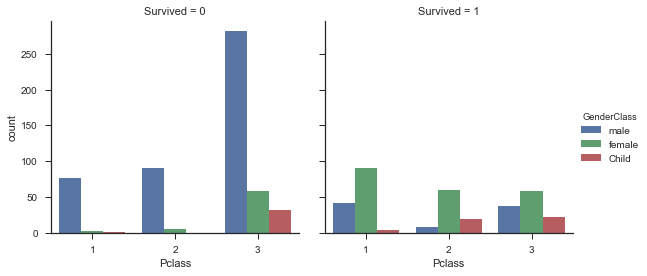

In [165]:
# USING catplot() to combine a countplot() and a FacetGrid
# factorplot has been changed in new version to catplot().
sns.factorplot(x="Pclass", hue="GenderClass", col="Survived", data=TitanicData, kind="count")